In [1]:
import tensorflow as tf
from tensorflow import keras

C:\Users\aboubakiri.diaw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\aboubakiri.diaw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\aboubakiri.diaw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\aboubakiri.diaw\Anaconda3\lib\site-packages\tensorflow\python\frame

In [4]:
from tensorflow.python.keras.layers import Conv2D

In [3]:
from tensorflow.python.keras.applications.resnet50 import preprocess_input

In [2]:
import numpy as np
from random import randint
#from sklearn.utils import shuffle
#from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Activation, Dense, Flatten, BatchNormalization, MaxPool2D
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.metrics import categorical_crossentropy
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
#import matplotlib.pyplot as plt
import os
import shutil
import random
import glob
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [6]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Activation, Dense, Flatten, BatchNormalization, MaxPool2D
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.metrics import categorical_crossentropy
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.applications.vgg16 import preprocess_input

## Data preparation

In [20]:
# Organize data into trai, valid, test dirs
os.chdir('C:/Users/aboubakiri.diaw/deploiement recomm/keras/train')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    
    for c in random.sample(glob.glob('cat*'), 500):
        shutil.move(c, 'train/cat')
    for c in random.sample(glob.glob('dog*'), 500): 
        shutil.move(c, 'train/dog')
    for c in random.sample(glob.glob('cat*'), 100):
        shutil.move(c, 'valid/cat')
    for c in random.sample(glob.glob('dog*'), 100): 
        shutil.move(c, 'valid/dog') 
    for c in random.sample(glob.glob('cat*'), 50):
        shutil.move(c, 'test/cat') 
    for c in random.sample(glob.glob('dog*'), 50): 
        shutil.move(c, 'test/dog')  
        
os.chdir('../../')        

In [38]:
train_path = 'C:/Users/aboubakiri.diaw/deploiement recomm/Datasets/train'
valid_path= 'keras/train/valid'
test_path = 'keras/train/test'


In [39]:
train_batches = ImageDataGenerator(preprocess_input).flow_from_directory(directory=train_path, target_size=(128,128), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False )


Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [42]:
datagen = ImageDataGenerator(rescale=1./255)
X = datagen.flow_from_directory('C:/Users/aboubakiri.diaw/deploiement recomm/keras/train/train',
                                    target_size= (128,128),
                                    batch_size=15,
                                    classes=['cat','df'])

Found 668 images belonging to 2 classes.


In [23]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [24]:
imgs, labels = next(train_batches)

C:\Users\aboubakiri.diaw\Anaconda3\envs\tensorflow\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [25]:
labels 

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [26]:
# this function will pplot images
def plotImages(images_arr):
    fig, axes = plt.subplots(1,10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
        plt.tight_layout()
        plt.show


In [27]:
plotImages(imgs)
print(labels)

NameError: name 'plt' is not defined

### Build and train a CNN

In [28]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224,224,3)), MaxPool2D(pool_size=(2,2), strides=2), Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),MaxPool2D(pool_size=(2,2), strides=2), Flatten(), Dense(units=2, activation='softmax'),
])

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 200704)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
________________________________________________

In [32]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy']) 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


ValueError: Tensor("dense_2/Identity:0", shape=(?, 2), dtype=float32) must be from the same graph as Tensor("dense_2_target:0", shape=(?, ?), dtype=float32).

In [63]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10


C:\Users\aboubakiri.diaw\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\aboubakiri.diaw\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


100/100 - 33s - loss: 25.4713 - acc: 0.5320 - val_loss: 5.6017 - val_acc: 0.5600
Epoch 2/10
100/100 - 31s - loss: 3.5407 - acc: 0.6930 - val_loss: 9.8182 - val_acc: 0.5100
Epoch 3/10
100/100 - 32s - loss: 0.9797 - acc: 0.8400 - val_loss: 1.9900 - val_acc: 0.6650
Epoch 4/10
100/100 - 32s - loss: 0.3241 - acc: 0.9240 - val_loss: 2.1226 - val_acc: 0.6600
Epoch 5/10
100/100 - 33s - loss: 0.1043 - acc: 0.9600 - val_loss: 2.1106 - val_acc: 0.6600
Epoch 6/10
100/100 - 32s - loss: 0.0436 - acc: 0.9870 - val_loss: 2.1188 - val_acc: 0.6500
Epoch 7/10
100/100 - 34s - loss: 0.0064 - acc: 0.9990 - val_loss: 2.1197 - val_acc: 0.6550
Epoch 8/10
100/100 - 35s - loss: 0.0024 - acc: 1.0000 - val_loss: 2.1935 - val_acc: 0.6600
Epoch 9/10
100/100 - 35s - loss: 0.0014 - acc: 1.0000 - val_loss: 2.2266 - val_acc: 0.6700
Epoch 10/10
100/100 - 35s - loss: 0.0012 - acc: 1.0000 - val_loss: 2.3154 - val_acc: 0.6600


## Prediction

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


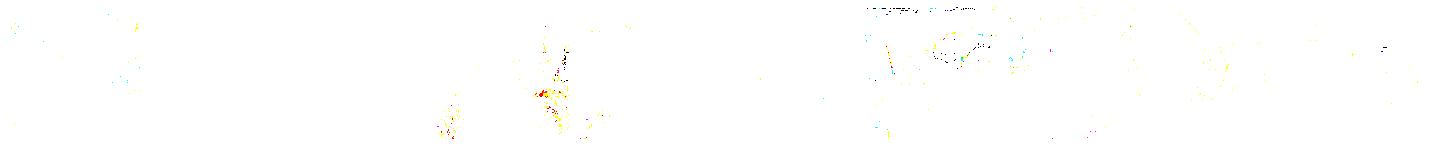

In [64]:
test_imgs, test_labels = next(test_batches)
plotImages(imgs)
print(test_labels)

In [65]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [66]:
predictions = model.predict(x=test_batches, verbose=0)

In [67]:
np.round(predictions)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [69]:
cm=confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [70]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm= cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('confusion matrix, without normalization')
    print(cm)
    
    thresh=cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, cm[i,j], horizontalalignment="center", 
        color="white" if cm[i,j]> thresh else "black")
                 
                 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [72]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

confusion matrix, without normalization
[[36 14]
 [20 30]]


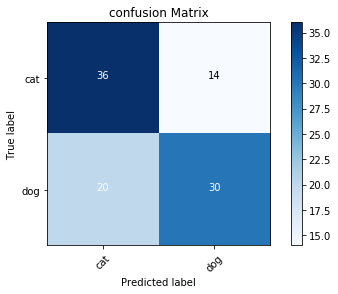

In [73]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='confusion Matrix')

## Buil Fine-tuned VGG16 model

In [93]:
from tensorflow.python.keras.applications.vgg16 import VGG16
from tensorflow.python.keras.models import load_model
vgg16_weights ='C:/Users/aboubakiri.diaw/deploiement recomm/keras/vgg16.h5'

vgg16_model = VGG16(weights=vgg16_weights)                                                    

In [94]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [95]:
type(vgg16_model)

tensorflow.python.keras.engine.training.Model

In [96]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)


In [97]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [98]:
for layer in model.layers:
    layer.trainable = False

In [100]:
model.add(Dense(units=2, activation='softmax'))

In [101]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

## Train the fine-tuned VGG16 model

In [102]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy']) 

In [103]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=5, verbose=2)

C:\Users\aboubakiri.diaw\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/5


C:\Users\aboubakiri.diaw\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\aboubakiri.diaw\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


100/100 - 321s - loss: 0.2465 - acc: 0.8990 - val_loss: 0.2051 - val_acc: 0.9000
Epoch 2/5
100/100 - 298s - loss: 0.1063 - acc: 0.9650 - val_loss: 0.1729 - val_acc: 0.9050
Epoch 3/5
100/100 - 301s - loss: 0.0733 - acc: 0.9730 - val_loss: 0.1590 - val_acc: 0.9300
Epoch 4/5
100/100 - 301s - loss: 0.0556 - acc: 0.9820 - val_loss: 0.1548 - val_acc: 0.9250
Epoch 5/5
100/100 - 300s - loss: 0.0413 - acc: 0.9890 - val_loss: 0.1402 - val_acc: 0.9300


## Predict using fine-tuned VGG16 model

In [105]:
predictions = model.predict(x=test_batches, verbose=0)

In [106]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [107]:
cm=confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [108]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

confusion matrix, without normalization
[[48  2]
 [ 7 43]]


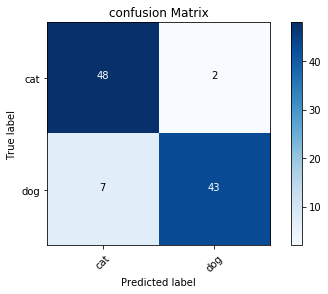

In [109]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='confusion Matrix')